In [8]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
%matplotlib inline

from __future__ import print_function
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
import pytraj as pt
import scipy
import scipy.cluster.hierarchy
from sklearn.decomposition import PCA

In [2]:
l=["1","2","3","4","5","6","31","32","33","34","35","36","37"]

In [3]:
print(l[1])

2


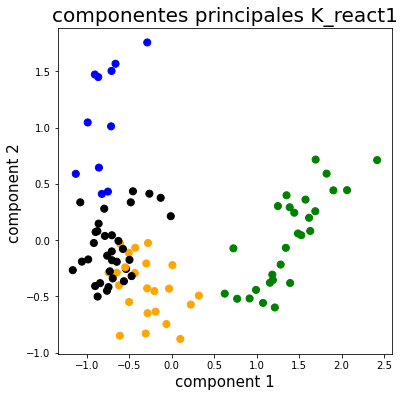

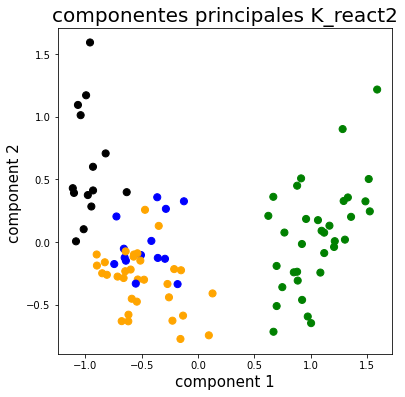

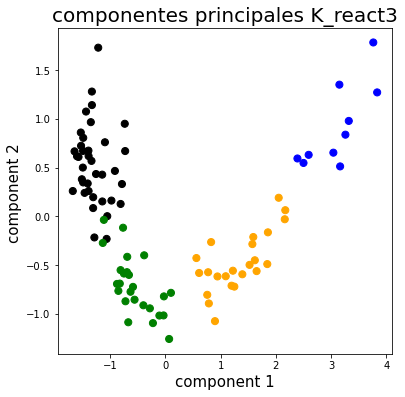

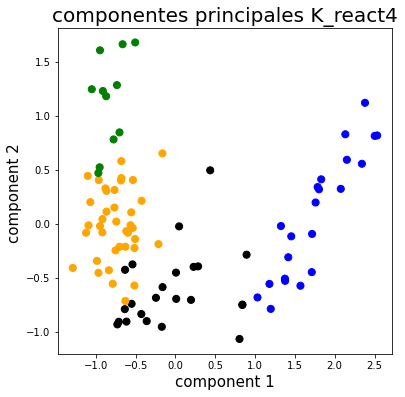

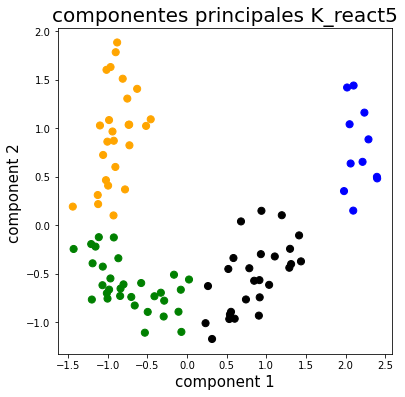

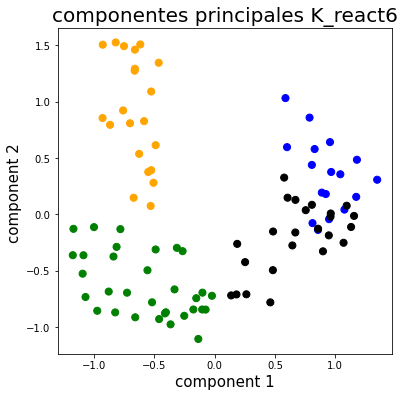

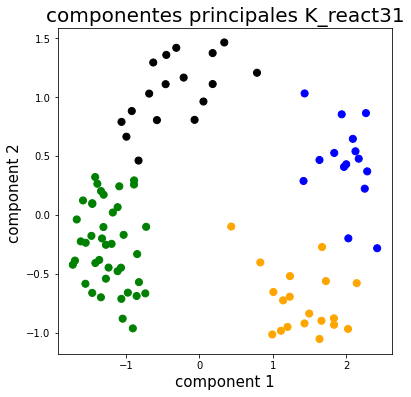

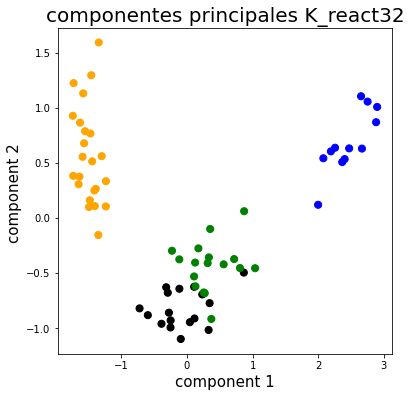

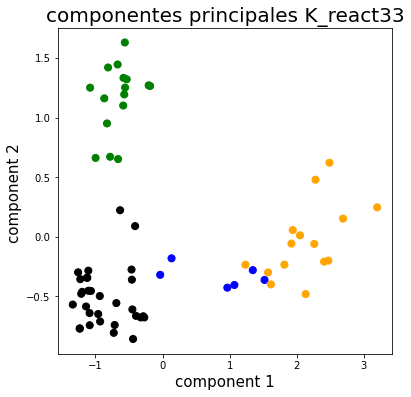

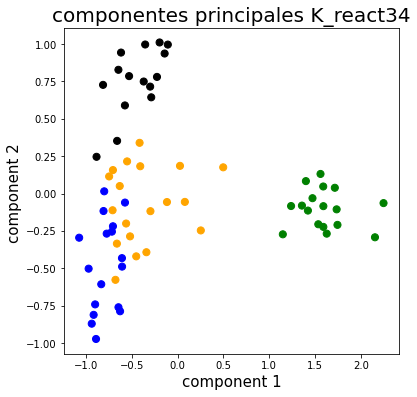

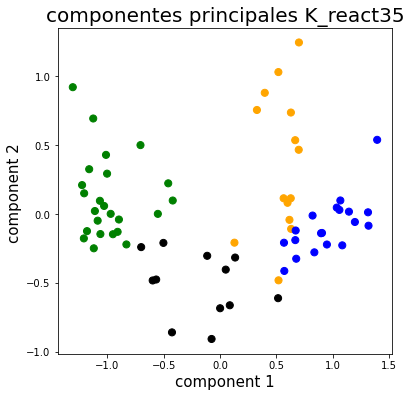

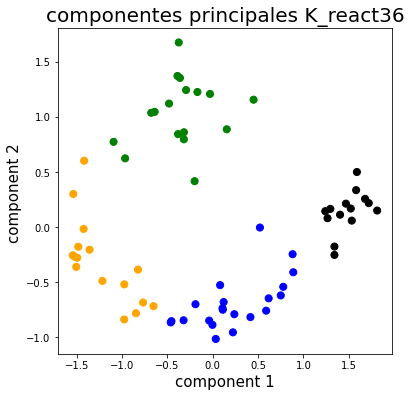

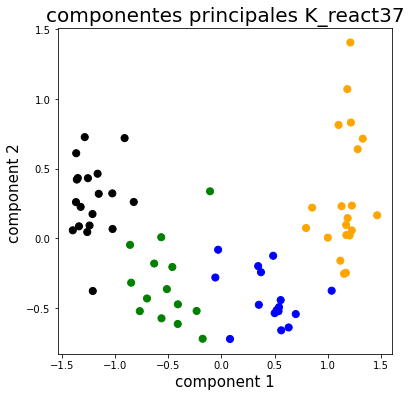

In [22]:
for e in l:
    dcd="react_kuma"+e+".dcd"
    top="KUMA"+e+"_wat.prmtop"
    traj=pt.iterload(dcd,top)
    distances=pt.pairwise_rmsd(traj(autoimage=True),mask="@CA")
    wcss=[]
    for i in range(1,11):
        kmeans=KMeans(n_clusters=i, max_iter=300)
        kmeans.fit(distances)
        wcss.append(kmeans.inertia_)
    #plt.plot(range(1,11),wcss)
    #plt.title("colze de jambú"+e)
    #plt.xlabel("nº de clusters")
    #plt.ylabel("WCSS")
    #plt.show() #majoritariament amb 3 clusters tenen suficient, excepte el 36 i el 35(4), el 37 i el 34 i el 31 (2)
    clustering = KMeans(n_clusters = 4, max_iter = 300) #crea el model
    clustering.fit(distances) #aplica el model a la base de dades (distances)
    #no em surt el mateix output que al video.
    pca =PCA(n_components=2)
    pca_distances=pca.fit_transform(distances)
    pca_distances_df = pd.DataFrame(data = pca_distances, columns = ["component_1", "component_2"])
    pca_clusternumber_distances=pca_distances_df.assign(cluster= clustering.labels_)
    #pca_clusternumber_distances
    fig =plt.figure(figsize=(6,6))
    ax = fig.add_subplot(1,1,1)
    ax.set_xlabel("component 1", fontsize = 15)
    ax.set_ylabel("component 2 ", fontsize = 15)
    ax.set_title("componentes principales K_react"+e, fontsize = 20)

    color_theme = np.array(["blue","green","orange", "black"])
    ax.scatter(x = pca_clusternumber_distances.component_1, y = pca_clusternumber_distances.component_2, 
              c=color_theme[pca_clusternumber_distances.cluster], s = 50)